# Signature Project
Project Objective: To demonstrate your ability with Machine Learning Regression based on classroom learning. 


Project Case: Prediction of news article popularity based on article attributes. 


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error,make_scorer, r2_score
from sklearn.preprocessing import StandardScaler


In [29]:

df = pd.read_csv('OnlineNewsPopularity.csv')

In [30]:
df.shape

(39644, 61)

In [31]:
## Pandas Setup Visuals
pd.set_option('display.max_columns', None)


In [32]:
df.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords  \
0          0.0               4.680365            5.0   
1          0.0               4.913725            4.0   
2          0.0               4.393365            6.0   
3          0.0               4.404896            7.0   
4          0.0               4.682836            7.0   

    data_channel_is_lifestyle   data_channel_is_entertainment  \
0                         0.0                             1.0   
1                         0.0                             0.0   
2                         0.0                             0.0   
3                         0.0                             1.0   
4                         0.0                             0.0   

    data_channel_is_bus   data_channel_is_socmed   data_channel_is_tech  \
0                   0.0                      0.0                    0.0   
1                   1.0                      0.0                    0.0   
2                   1.0                      0.0                    0.0   
3                   0.0                      0.0                    0.0   
4                   0.0                      0.0                    1.0   

    data_channel_is_world   kw_min_min   kw_max_min   kw_avg_min   kw_min_max  \
0                     0.0          0.0          0.0          0.0          0.0   
1                     0.0          0.0          0.0          0.0          0.0   
2                     0.0          0.0          0.0          0.0          0.0   
3                     0.0          0.0          0.0          0.0          0.0   
4                     0.0          0.0          0.0          0.0          0.0   

    kw_max_max   kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

    self_reference_min_shares   self_reference_max_shares  \
0                       496.0                       496.0   
1                         0.0                         0.0   
2                       918.0                       918.0   
3                         0.0                         0.0   
4                       545.0                     16000.0   

    self_reference_avg_sharess   weekday_is_monday   weekday_is_tuesday  \
0                   496.000000                 1.0                  0.0   
1                     0.000000                 1.0                  0.0   
2                   918.000000                 1.0         

In [33]:
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

        num_keywords   data_channel_is_lifestyle  \
count   39644.000000                39644.000000   
mean        7.223767                    0.052946   
std         1.909130                    0.223929   
min         1.000000                    0.000000   
25%         6.000000                    0.000000   
50%         7.000000                    0.000000   
75%         9.000000                    0.000000   
max        10.000000                    1.000000   

        data_channel_is_entertainment   data_channel_is_bus  \
count                    39644.000000          39644.000000   
mean                         0.178009              0.157855   
std                          0.382525              0.364610   
min                          0.000000              0.000000   
25%                          0.000000              0.000000   
50%                          0.000000              0.000000   
75%                          0.000000              0.000000   
max                          1.000000              1.000000   

        data_channel_is_socmed   data_channel_is_tech   data_channel_is_world  \
count             39644.000000           39644.000000            39644.000000   
mean                  0.058597               0.185299                0.212567   
std                   0.234871               0.388545                0.409129   
min                   0.000000               0.000000                0.000000   
25%                   0.000000               0.000000                0.000000   
50%                   0.000000               0.000000                0.000000   
75%                   0.000000               0.000000                0.000000   
max                   1.000000               1.000000                1.000000   

         kw_min_min     kw_max_min    kw_avg_min     kw_min_max  \
count  39644.000000   39644.000000  39644.000000   39644.000000   
mean      26.106801    1153.951682    312.366967   13612.354102   
std       69.633215    3857.9908

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

The output above shows apart from the first column 'url' which is an object, all of the other features are of the datatype float/int.
This means that the categorical variables were already encoded before making this dataset available. Now, furtehr we will have to check which among the 61 features are categorical in nature.  
The following can be done with by visualising our data, finding out unique values of features and some knowledge of subject matter. 


In [9]:
df[' shares'].unique()

array([  593,   711,  1500, ..., 34500, 25600, 45000], dtype=int64)

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.nunique()

url                               39644
 timedelta                          724
 n_tokens_title                      20
 n_tokens_content                  2406
 n_unique_tokens                  27281
 n_non_stop_words                  1451
 n_non_stop_unique_tokens         22930
 num_hrefs                          133
 num_self_hrefs                      59
 num_imgs                            91
 num_videos                          53
 average_token_length             30136
 num_keywords                        10
 data_channel_is_lifestyle            2
 data_channel_is_entertainment        2
 data_channel_is_bus                  2
 data_channel_is_socmed               2
 data_channel_is_tech                 2
 data_channel_is_world                2
 kw_min_min                          26
 kw_max_min                        1076
 kw_avg_min                       17003
 kw_min_max                        1021
 kw_max_max                          35
 kw_avg_max                       30834


After displaying all the unique values, of each feature in our dataset it can be seen that out of all the varying values, the features having only two unique values can be considered as categorical data. Hence, these variables can be considered as categorical varibles and the rest of our dataset to be considered numerical.

# Data Issues

In [11]:
df.isnull().sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

This implies that there are no null values in our dataset and hence we need not handle them

---------------------------------------------------------------------------------------------

Since, the url holds no significance with respect to the number of shares, it a column which will be dropped. This is because the popluarity measure,i.e., Shares does not depend on the fact of our link is structured and also because shares is a numerical data but url is an object datatype a.k.a string but rather on the basis of the content and other factors which will be found out. 

In [34]:
df.drop(['url'],axis=1,inplace=True)

In [35]:
df.corr()

timedelta   n_tokens_title  \
 timedelta                        1.000000        -0.240320   
 n_tokens_title                  -0.240320         1.000000   
 n_tokens_content                -0.062867         0.018160   
 n_unique_tokens                  0.002866        -0.005318   
 n_non_stop_words                 0.000089        -0.004754   
 n_non_stop_unique_tokens         0.003805        -0.005420   
 num_hrefs                       -0.000832        -0.053496   
 num_self_hrefs                   0.064530        -0.014856   
 num_imgs                        -0.027636        -0.008858   
 num_videos                       0.000936         0.051460   
 average_token_length             0.130465        -0.071403   
 num_keywords                     0.046884        -0.006077   
 data_channel_is_lifestyle        0.054492        -0.070815   
 data_channel_is_entertainment   -0.049109         0.132791   
 data_channel_is_bus              0.055788        -0.023902   
 data_channel_is_socmed           0.076287        -0.090394   
 data_channel_is_tech             0.083277        -0.046716   
 data_channel_is_world           -0.170250         0.049223   
 kw_min_min                       0.591199        -0.110672   
 kw_max_min                       0.029503        -0.005890   
 kw_avg_min                       0.133225        -0.031400   
 kw_min_max                      -0.076590         0.012926   
 kw_max_max                      -0.637824         0.120841   
 kw_avg_max                      -0.493093         0.115746   
 kw_min_avg                      -0.157204        -0.002370   
 kw_max_avg                      -0.051820         0.006918   
 kw_avg_avg                      -0.163164         0.004296   
 self_reference_min_shares       -0.011438        -0.004563   
 self_reference_max_shares       -0.014501         0.000128   
 self_reference_avg_sharess      -0.015655         0.000661   
 weekday_is_monday               -0.006129         0.004274   
 weekday_is_tuesday              -0.005781         0.009322   
 weekday_is_wednesday             0.009961         0.008935   
 weekday_is_thursday              0.004042        -0.015472   
 weekday_is_friday               -0.002853        -0.002015   
 weekday_is_saturday             -0.004067        -0.015013   
 weekday_is_sunday                0.004226         0.006289   
 is_weekend                       0.000272        -0.005996   
 LDA_00                           0.080894        -0.070038   
 LDA_01                           0.004423         0.063568   
 LDA_02                          -0.141713         0.038365   
 LDA_03                          -0.030838         0.042208   
 LDA_04                           0.092906        -0.065063   
 global_subjectivity              0.133837        -0.056804   
 global_sentiment_polarity        0.158646        -0.072226   
 global_rate_positive_words       0.207604        -0.064951   
 global_rate_negative_words       0.010266         0.015530   
 rate_positive_words              0.198654        -0.066589   
 rate_negative_words             -0.071968         0.034186   
 avg_positive_polarity            0.126344        -0.049619   
 min_positive_polarity            0.054772        -0.025069   
 max_positive_polarity            0.098288        -0.021662   
 avg_negative_polarity           -0.000507        -0.017096   
 min_negative_polarity            0.062175        -0.029146   
 max_negative_polarity           -0.063239         0.011425   
 title_subjectivity              -0.015919         0.077245   
 title_sentiment_polarity         0.038711         0.000240   
 abs_title_subjectivity           0.011551        -0.146954   
 abs_title_sentiment_polarity    -0.002745         0.040550   
 shares                           0.008662         0.008783   

                                 n_tokens_content   n_unique_tokens  \
 timedelta                              -0.062867          0.002866   
 n_tokens_title                          0.0181

In [36]:
df.duplicated().sum()

0

Hence we have no duplication of any values in our dataset


# EDA


In [37]:
df[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [47]:
df.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

        num_keywords   data_channel_is_lifestyle  \
count   39644.000000                39644.000000   
mean        7.223767                    0.052946   
std         1.909130                    0.223929   
min         1.000000                    0.000000   
25%         6.000000                    0.000000   
50%         7.000000                    0.000000   
75%         9.000000                    0.000000   
max        10.000000                    1.000000   

        data_channel_is_entertainment   data_channel_is_bus  \
count                    39644.000000          39644.000000   
mean                         0.178009              0.157855   
std                          0.382525              0.364610   
min                          0.000000              0.000000   
25%                          0.000000              0.000000   
50%                          0.000000              0.000000   
75%                          0.000000              0.000000   
max                          1.000000              1.000000   

        data_channel_is_socmed   data_channel_is_tech   data_channel_is_world  \
count             39644.000000           39644.000000            39644.000000   
mean                  0.058597               0.185299                0.212567   
std                   0.234871               0.388545                0.409129   
min                   0.000000               0.000000                0.000000   
25%                   0.000000               0.000000                0.000000   
50%                   0.000000               0.000000                0.000000   
75%                   0.000000               0.000000                0.000000   
max                   1.000000               1.000000                1.000000   

         kw_min_min     kw_max_min    kw_avg_min     kw_min_max  \
count  39644.000000   39644.000000  39644.000000   39644.000000   
mean      26.106801    1153.951682    312.366967   13612.354102   
std       69.633215    3857.9908

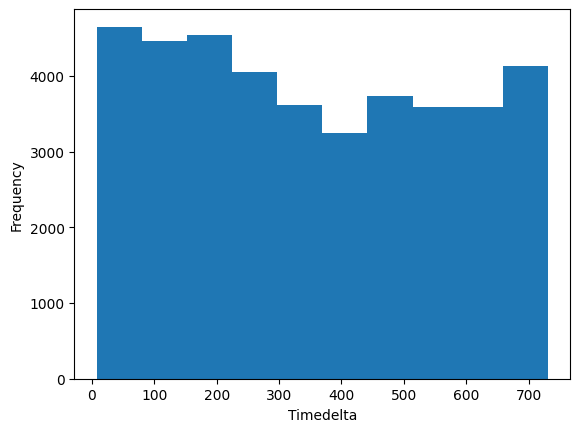

In [48]:
plt.hist(df[' timedelta'], bins=10)
plt.xlabel('Timedelta')
plt.ylabel('Frequency')
plt.show()

As defined in the description of the dataset, timedelta is the Days between the article publication and the dataset acquisition. hence it is irrelevant to our study about news popularity. Hence, it will be dropped.

In [38]:
df.drop([' timedelta'],axis=1,inplace=True)

While analysing this dataset as per our problem statement, one major question comes to mind.What features affact our target variable shares? This can be analysed through various visualisations as seen below:

In [17]:
cm=df.corr()
cm

n_tokens_title   n_tokens_content  \
 n_tokens_title                        1.000000           0.018160   
 n_tokens_content                      0.018160           1.000000   
 n_unique_tokens                      -0.005318          -0.004737   
 n_non_stop_words                     -0.004754           0.017512   
 n_non_stop_unique_tokens             -0.005420           0.000373   
 num_hrefs                            -0.053496           0.423065   
 num_self_hrefs                       -0.014856           0.304682   
 num_imgs                             -0.008858           0.342600   
 num_videos                            0.051460           0.103699   
 average_token_length                 -0.071403           0.167789   
 num_keywords                         -0.006077           0.072845   
 data_channel_is_lifestyle            -0.070815           0.037548   
 data_channel_is_entertainment         0.132791           0.060200   
 data_channel_is_bus                  -0.023902          -0.006105   
 data_channel_is_socmed               -0.090394           0.033424   
 data_channel_is_tech                 -0.046716           0.025408   
 data_channel_is_world                 0.049223           0.055989   
 kw_min_min                           -0.110672          -0.054345   
 kw_max_min                           -0.005890           0.000066   
 kw_avg_min                           -0.031400          -0.003545   
 kw_min_max                            0.012926          -0.022786   
 kw_max_max                            0.120841           0.058860   
 kw_avg_max                            0.115746          -0.096460   
 kw_min_avg                           -0.002370          -0.022286   
 kw_max_avg                            0.006918          -0.030496   
 kw_avg_avg                            0.004296          -0.079624   
 self_reference_min_shares            -0.004563          -0.030686   
 self_reference_max_shares             0.000128           0.025657   
 self_reference_avg_sharess            0.000661          -0.013809   
 weekday_is_monday                     0.004274          -0.002484   
 weekday_is_tuesday                    0.009322          -0.004027   
 weekday_is_wednesday                  0.008935          -0.016891   
 weekday_is_thursday                  -0.015472          -0.007395   
 weekday_is_friday                    -0.002015          -0.015949   
 weekday_is_saturday                  -0.015013           0.034538   
 weekday_is_sunday                     0.006289           0.036394   
 is_weekend                           -0.005996           0.052024   
 LDA_00                               -0.070038           0.026218   
 LDA_01                                0.063568          -0.009724   
 LDA_02                                0.038365           0.087266   
 LDA_03                                0.042208          -0.140141   
 LDA_04                               -0.065063           0.041265   
 global_subjectivity                  -0.056804           0.127879   
 global_sentiment_polarity            -0.072226           0.021937   
 global_rate_positive_words           -0.064951           0.133979   
 global_rate_negative_words            0.015530           0.125013   
 rate_positive_words                  -0.066589           0.098960   
 rate_negative_words                   0.034186           0.101053   
 avg_positive_polarity                -0.049619           0.135123   
 min_positive_polarity                -0.025069          -0.261493   
 max_positive_polarity                -0.021662           0.415706   
 avg_negative_polarity                -0.017096          -0.130375   
 min_negative_polarity                -0.029146          -0.450603   
 max_negative_polarity                 0.011425           0.225870   
 title_subjectivity                    0.077245           0.004484   
 title_sentiment_polarity              0.000240           0.023358   
 abs_title_subjectivity               -0.14

In [51]:
df.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

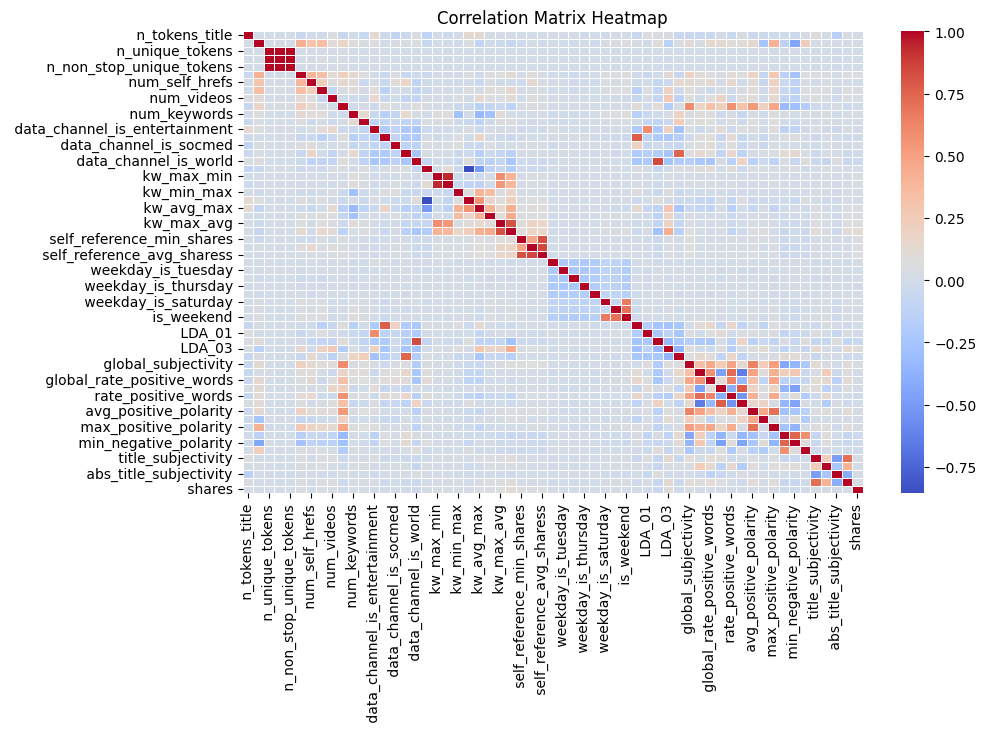

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, cmap='coolwarm', linewidths=0.7,annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()



Hence, from this we infer that apart from the strong correlation of variables with themselves, there are issues of multicollinearity, as some variable are strongly correlated with each other, a significant example being n_unique_tokens and n_non_stop_unique_tokens and n_non_stop_words which can be dropped. Apart from this we see an average correlation of 0.27 of our target variable shares with the rest of the features. Hence we will have to look at other techniques for feature selection

In [53]:
df[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

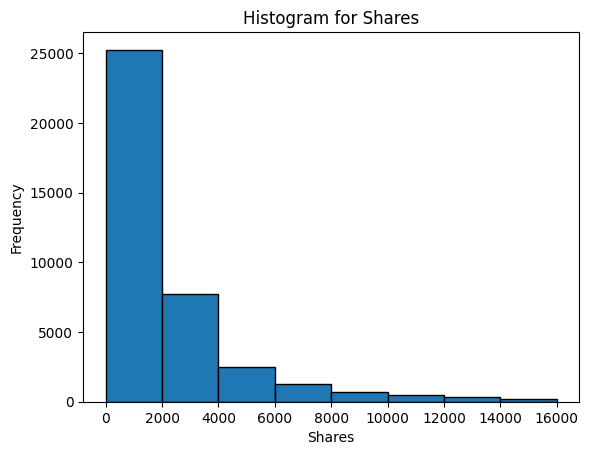

In [18]:
plt.hist(df[' shares'], bins=8,range=(0, 16000) , edgecolor='black')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.title('Histogram for Shares')
plt.show()

Majority of our shares, lie in the range between 0 to approximately equivalent to the upper quartile. only 25% of data is present beyond 75 

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

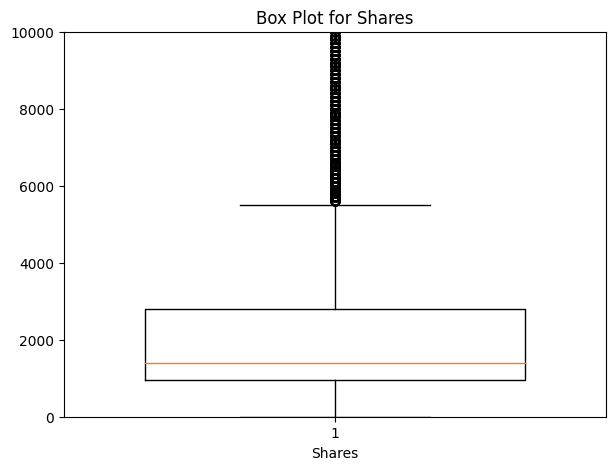

In [19]:
plt.figure(figsize=(7, 5))  
plt.boxplot(df[' shares'], vert=True, widths=0.7)
plt.xlabel('Shares')
plt.title('Box Plot for Shares')
plt.ylim(0,10000)
#plt.xlim(0,10000)
plt.show
df[' shares'].describe()

In [39]:

Q1 = df[' shares'].quantile(0.25)
Q3 = df[' shares'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_no_outliers = df[(df[' shares'] >= lower_bound) & (df[' shares'] <= upper_bound)]
df_no_outliers[' shares'].describe()



count    35103.000000
mean      1671.972652
std       1103.199563
min          1.000000
25%        903.000000
50%       1300.000000
75%       2100.000000
max       5500.000000
Name:  shares, dtype: float64

In [41]:
df_no_outliers.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

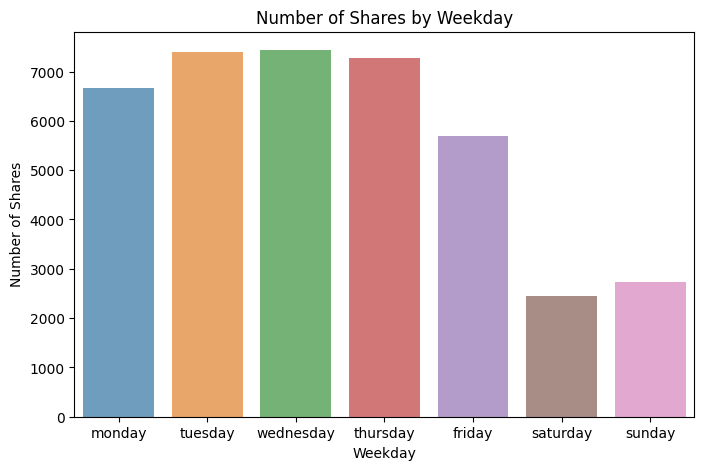

In [54]:
weekday_features = [
    ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
    ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday'
]

weekday_counts = df[weekday_features].sum()
weekday_counts.index = [weekday.split('_')[-1] for weekday in weekday_counts.index]

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=weekday_counts.index, y=weekday_counts.values, alpha=0.7)
ax.set_xlabel('Weekday')
ax.set_ylabel('Number of Shares')
ax.set_title('Number of Shares by Weekday')

plt.show()


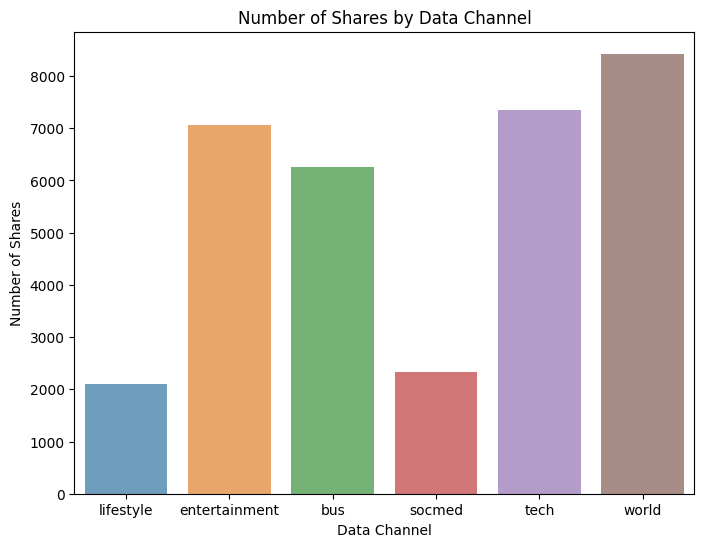

In [56]:

data_channel_features = [
    ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
    ' data_channel_is_bus', ' data_channel_is_socmed',
    ' data_channel_is_tech', ' data_channel_is_world'
]

data_counts = df[data_channel_features].sum()
data_counts.index = [channel.split('_')[-1] for channel in data_counts.index]

# Plot the data counts
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=data_counts.index, y=data_counts.values, alpha=0.7)
ax.set_xlabel('Data Channel')
ax.set_ylabel('Number of Shares')
ax.set_title('Number of Shares by Data Channel')

plt.show()


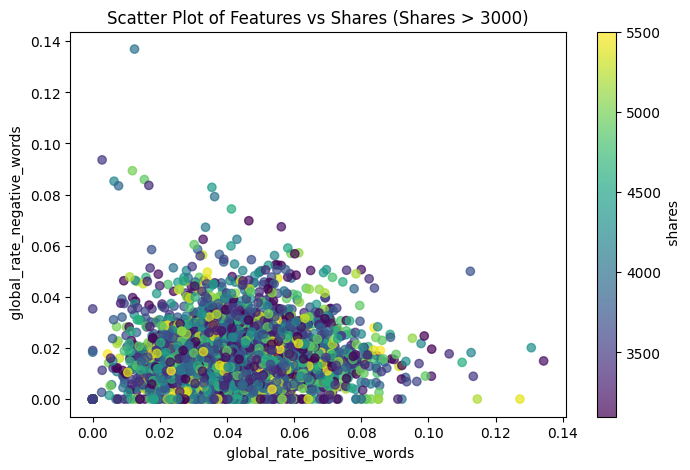

In [71]:
features = [' global_rate_positive_words', ' global_rate_negative_words']
target = ' shares'

# Create a scatter plot
df_high_shares = df_no_outliers[df_no_outliers[target] > 3000]

# Create a scatter plot for articles with shares greater than 3000
plt.figure(figsize=(8, 5))
plt.scatter(df_high_shares[features[0]], df_high_shares[features[1]], c=df_high_shares[target], cmap='viridis', alpha=0.7)
plt.colorbar(label=target)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Scatter Plot of Features vs Shares (Shares > 3000)')
plt.show()

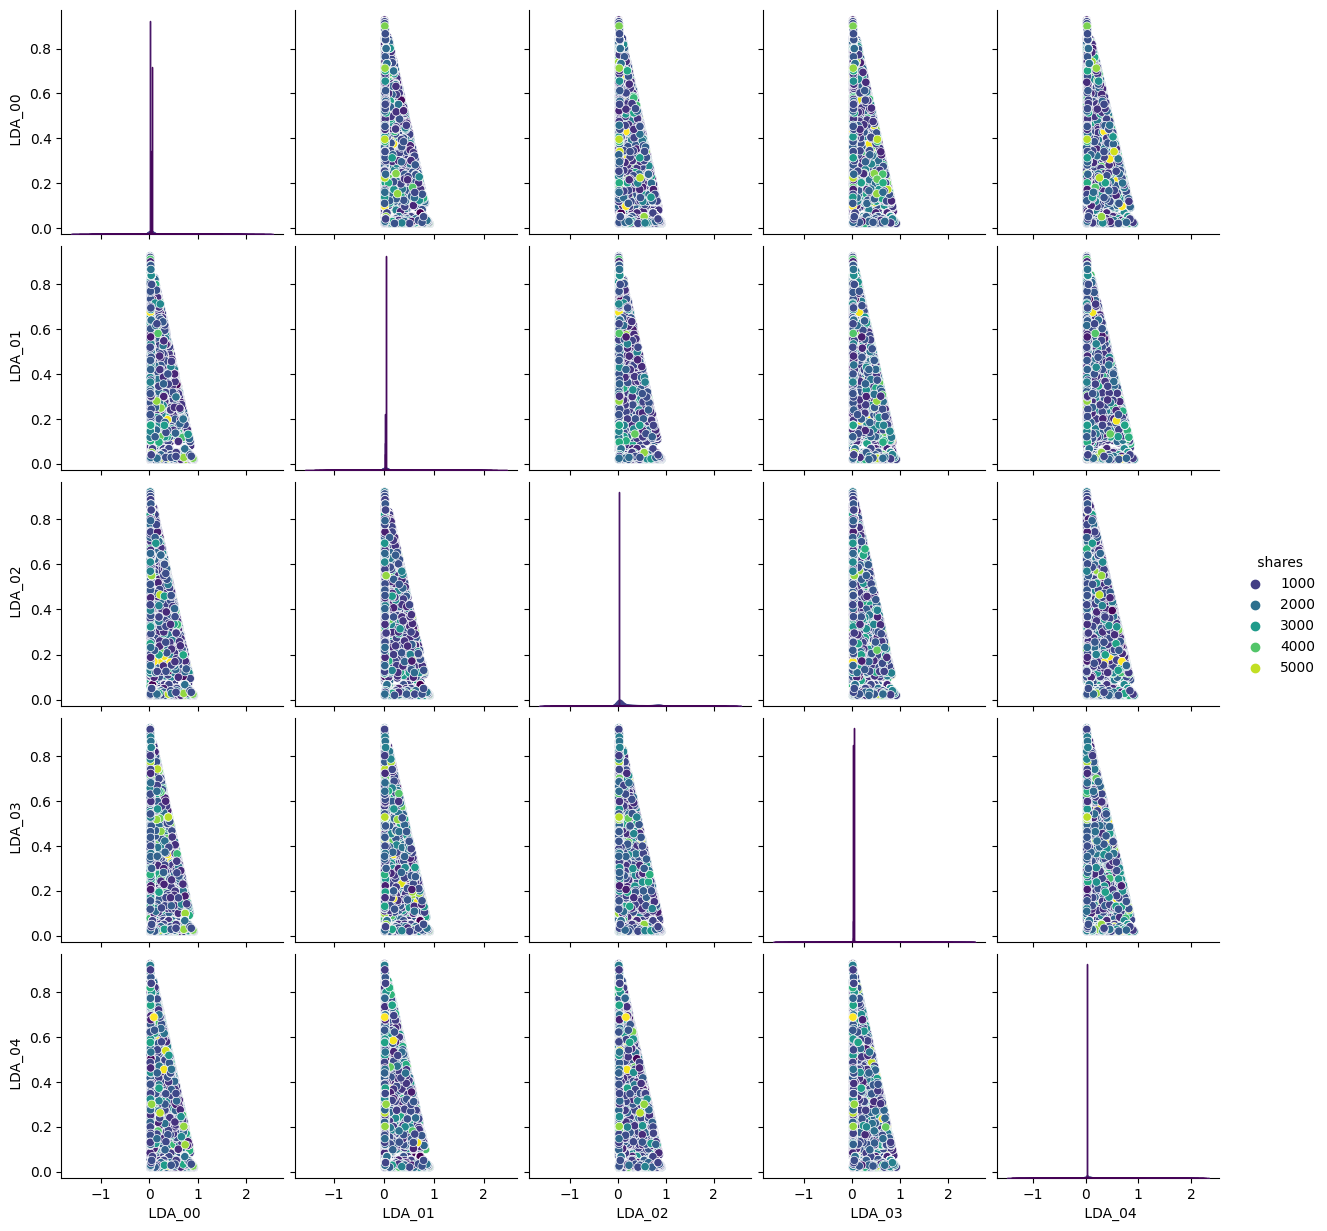

In [72]:
lda_features = [' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' shares']
sns.pairplot(df_no_outliers[lda_features], hue=' shares', palette='viridis')

<Axes: xlabel=' avg_positive_polarity', ylabel=' shares'>

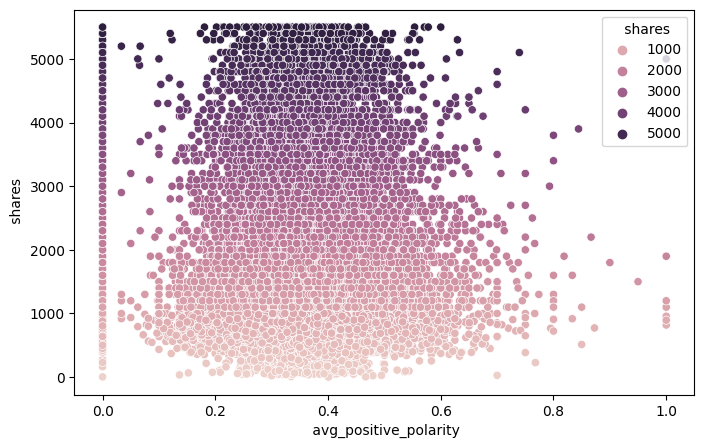

In [76]:
temp_data = df_no_outliers[df_no_outliers[' shares'] <=100000]
fig, axes = plt.subplots(figsize=(8,5))
sns.scatterplot(x=' avg_positive_polarity', y=' shares', hue=' shares', data=temp_data, ax=axes)

<Axes: xlabel=' avg_negative_polarity', ylabel=' shares'>

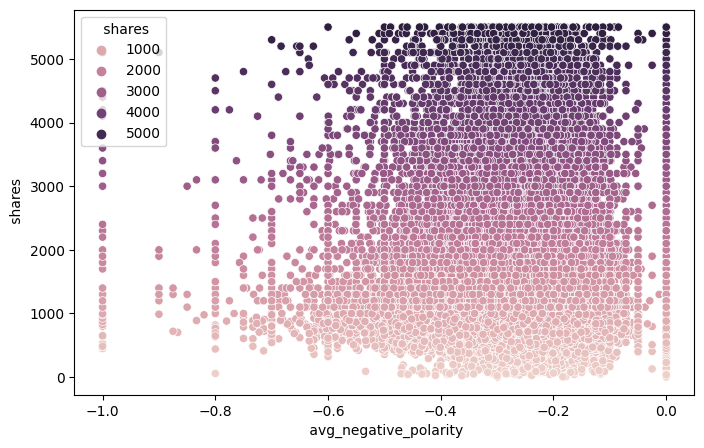

In [77]:
temp_data = df_no_outliers[df_no_outliers[' shares'] <=100000]
fig, axes = plt.subplots(figsize=(8,5))
sns.scatterplot(x=' avg_negative_polarity', y=' shares', hue=' shares', data=temp_data, ax=axes)

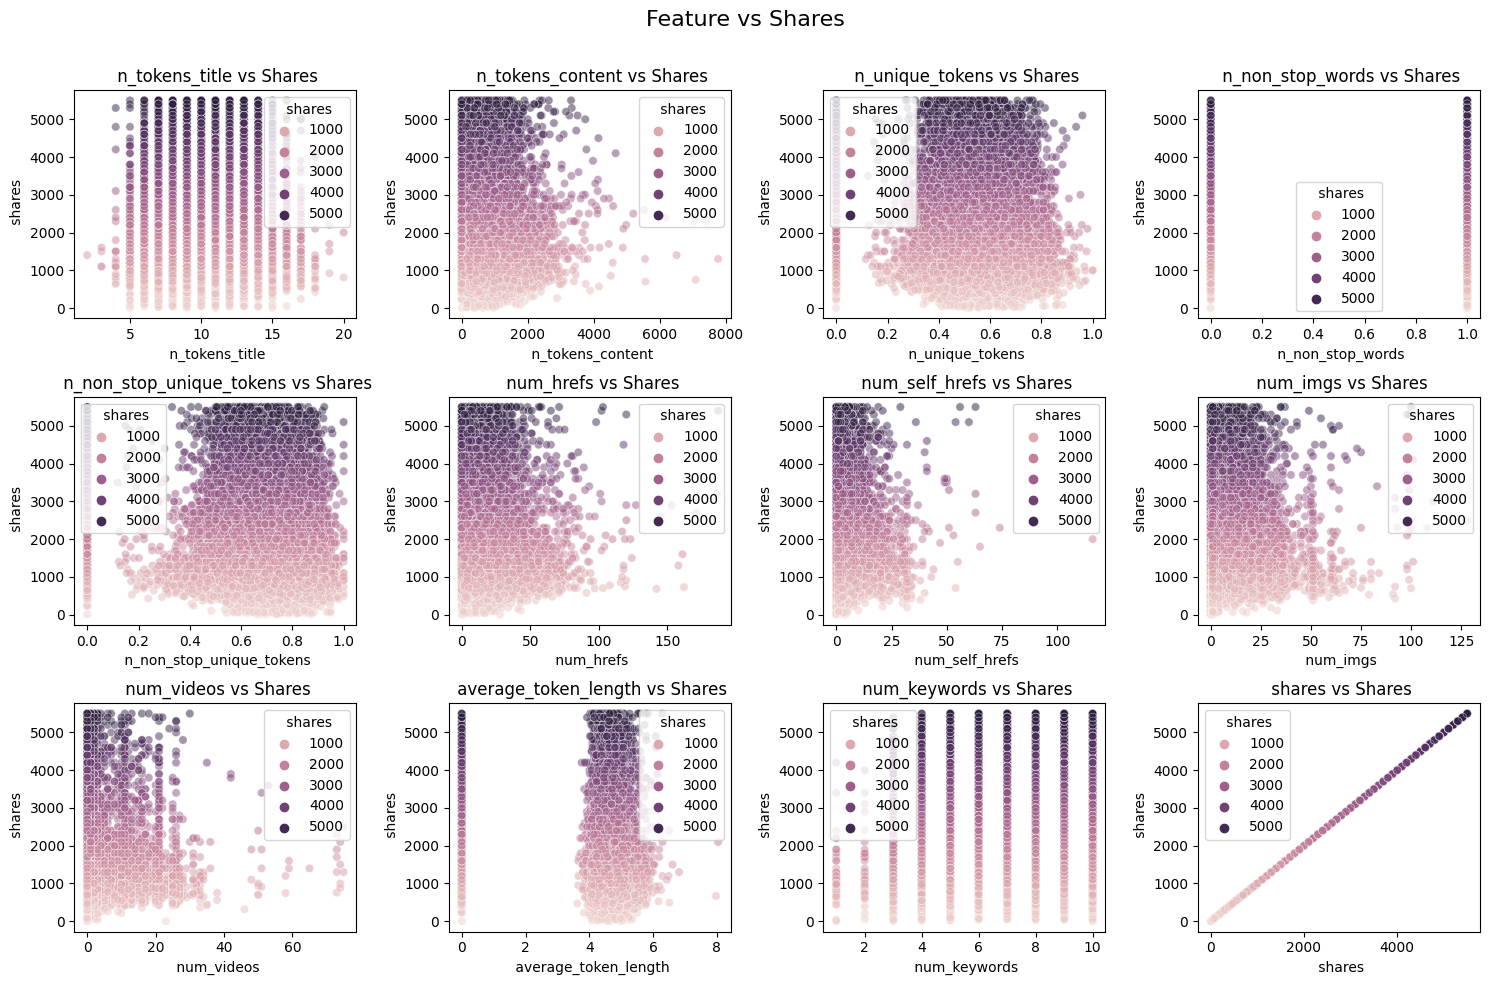

In [110]:
selected_features = [
    ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
    ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
    ' num_self_hrefs', ' num_imgs', ' num_videos',
    ' average_token_length', ' num_keywords', ' shares'
]

# Create subplots for each feature
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Feature vs Shares', fontsize=16)

for i, feature in enumerate(selected_features):
    row, col = i // 4, i % 4
    ax = axes[row, col]
    sns.scatterplot(data=df_no_outliers, x=feature, y=' shares', ax=ax, alpha=0.5,hue=' shares')
    ax.set_title(f'{feature} vs Shares')

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

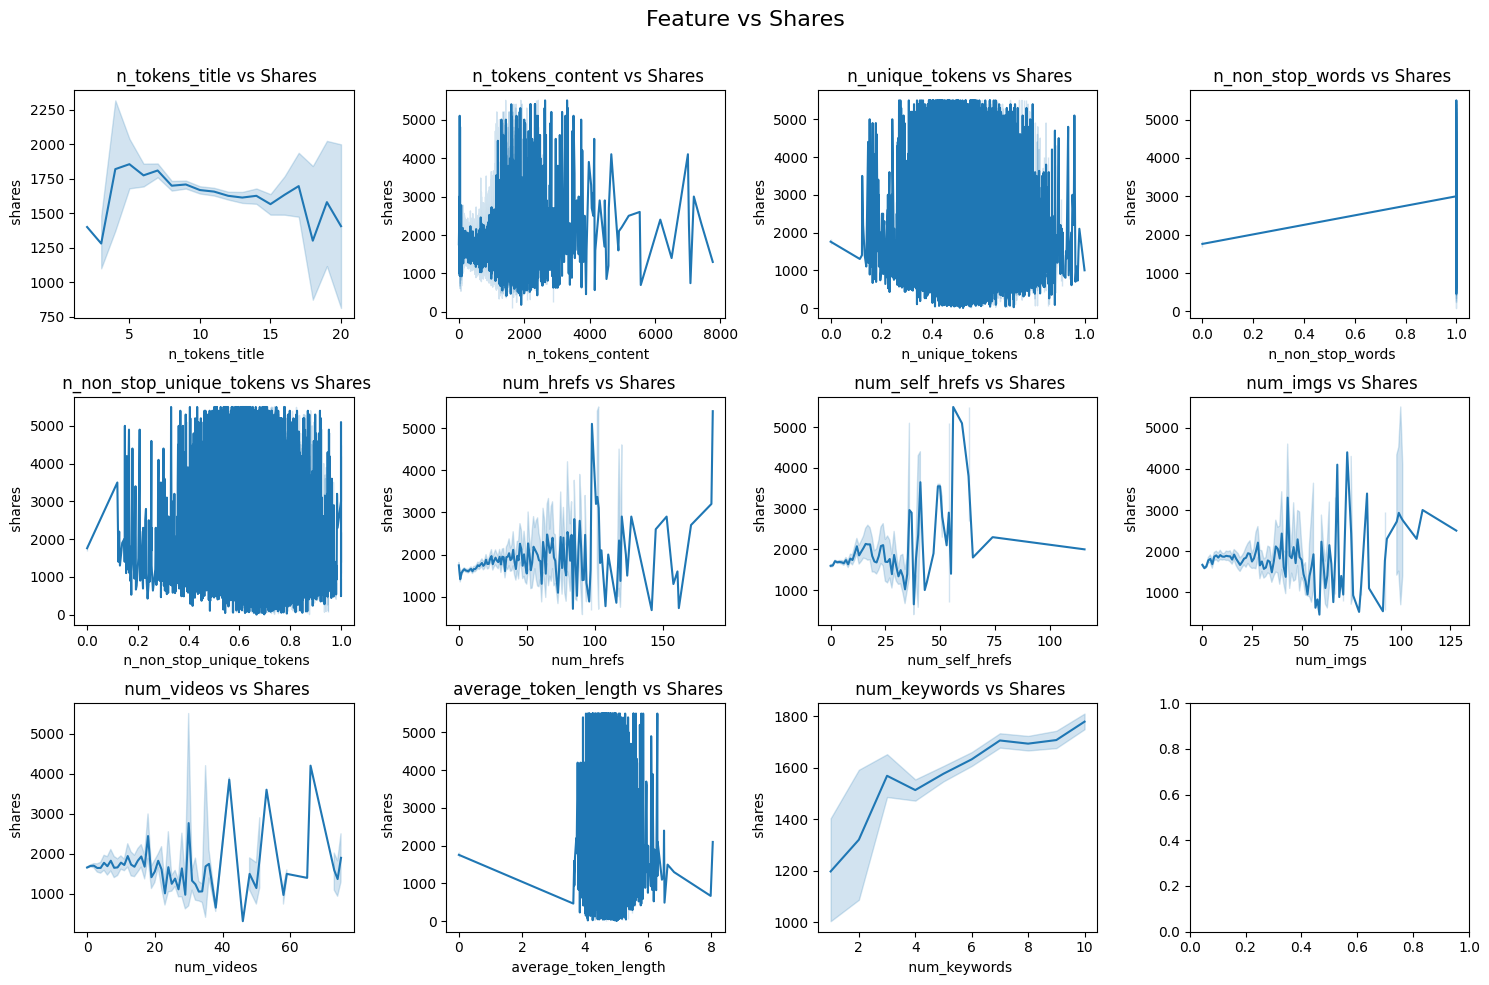

In [103]:
selected_features = [
    ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
    ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
    ' num_self_hrefs', ' num_imgs', ' num_videos',
    ' average_token_length', ' num_keywords', ' shares'
]


fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Feature vs Shares', fontsize=16)

for i, feature in enumerate(selected_features):
    if feature == ' shares':
        continue  # Skip the target variable
    row, col = i // 4, i % 4
    ax = axes[row, col]
    sns.lineplot(data=df_no_outliers, x=feature, y=' shares', ax=ax)
    ax.set_title(f'{feature} vs Shares')


plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

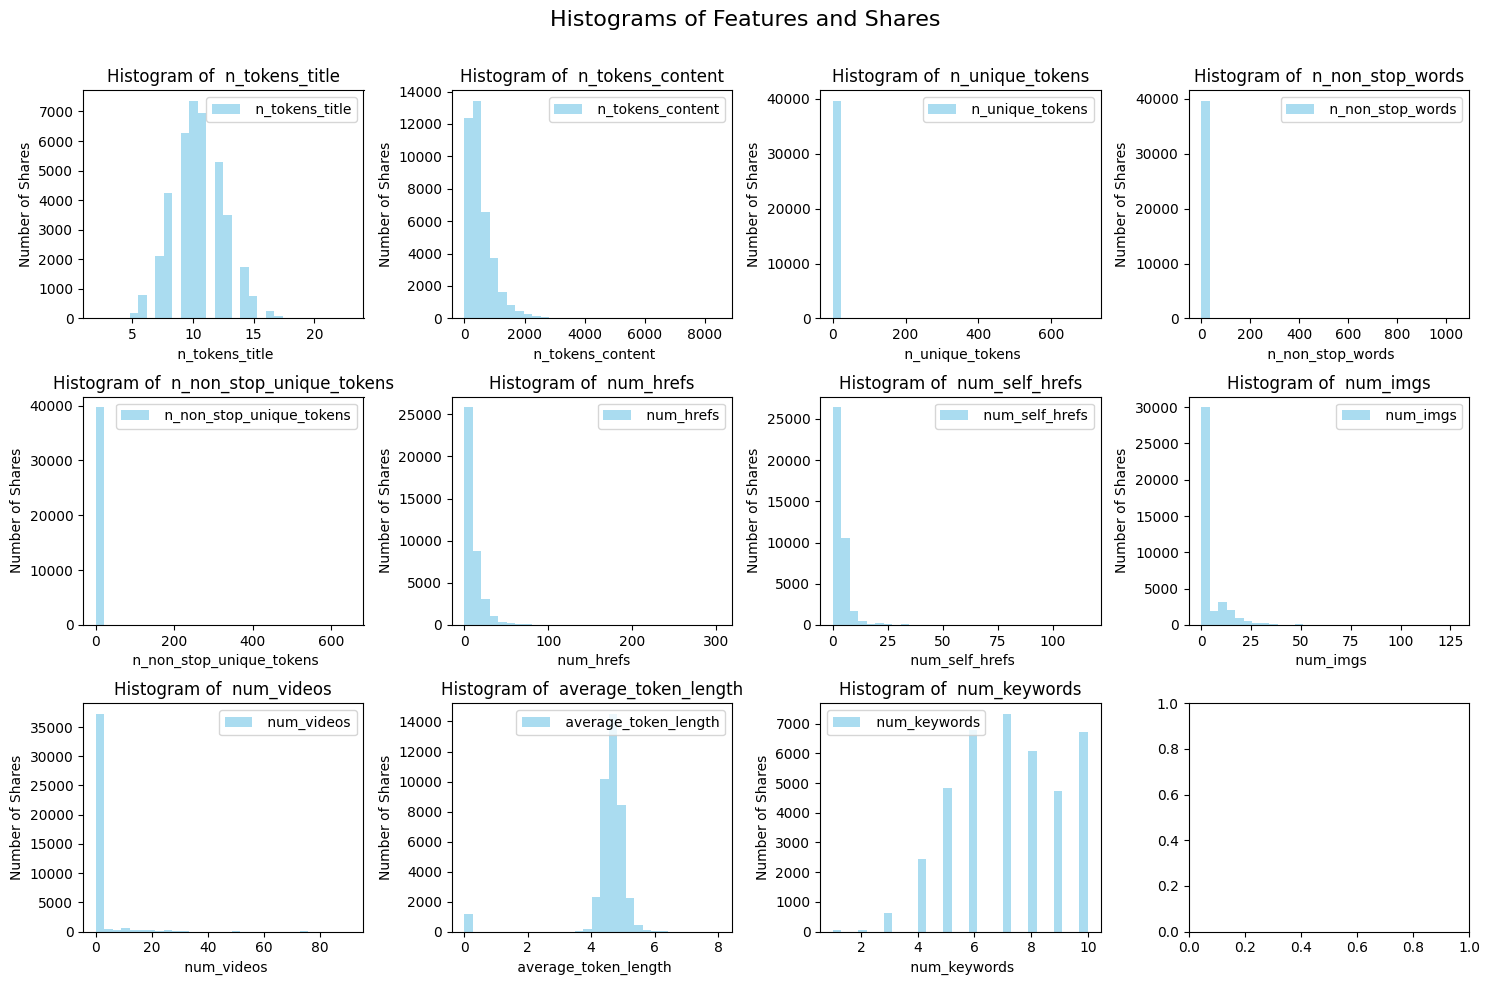

In [111]:
selected_features = [
    ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
    ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
    ' num_self_hrefs', ' num_imgs', ' num_videos',
    ' average_token_length', ' num_keywords'
]

# Create subplots for each feature
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('Histograms of Features and Shares', fontsize=16)

for i, feature in enumerate(selected_features):
    row, col = i // 4, i % 4
    ax = axes[row, col]
    
    # Create histograms
    ax.hist(df[feature], bins=30, color='skyblue', alpha=0.7, label=feature)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Number of Shares')
    ax.legend()

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [42]:
df_no_outliers.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

# Feature Selection


In [56]:

from sklearn.preprocessing import StandardScaler
import numpy as np

X = df_no_outliers.drop(' shares', axis=1)  
y = df_no_outliers[' shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler()

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
y_scaled_train = scaler.fit_transform(y_train)
y_scaled_test = scaler.transform(y_test)

(24572, 58) (10531, 58) (24572,) (10531,)


In [61]:
#performing the one-way anova test for features in dataframe, df_no_outliers
import pandas as pd
from scipy.stats import f_oneway

# Extract the dependent variable 'shares' and the categorical features
shares = df_no_outliers[' shares']
categorical_features = df_no_outliers[[' data_channel_is_lifestyle', ' data_channel_is_entertainment', 
                           ' data_channel_is_bus', ' data_channel_is_socmed', 
                           ' data_channel_is_tech', ' data_channel_is_world', 
                           ' weekday_is_monday', ' weekday_is_tuesday', 
                           ' weekday_is_wednesday', ' weekday_is_thursday', 
                           ' weekday_is_friday', ' weekday_is_saturday', 
                           ' weekday_is_sunday', ' is_weekend']]

# Perform one-way ANOVA for each categorical feature
anova_results = []

for column in categorical_features.columns:
    unique_categories = categorical_features[column].unique()
    unique_categories = [cat for cat in unique_categories if not pd.isnull(cat)]  # Filter out NaN values
    group_data = [shares[categorical_features[column] == category] for category in unique_categories]
    
    if len(group_data) > 1:
        f_statistic, p_value = f_oneway(*group_data)
        p_value = round(p_value, 3)
    else:
        f_statistic, p_value = 0, 1  # If only one group, set p-value to 1 (no significant difference)
    
    anova_results.append({'Feature': column, 'F-Statistic': f_statistic, 'P-Value': p_value})

# Create a DataFrame to display the ANOVA results
anova_df = pd.DataFrame(anova_results)

# Display the results
print(anova_df)


                           Feature  F-Statistic  P-Value
0        data_channel_is_lifestyle    34.723936    0.000
1    data_channel_is_entertainment   394.487830    0.000
2              data_channel_is_bus     0.094378    0.759
3           data_channel_is_socmed   469.971510    0.000
4             data_channel_is_tech   336.038747    0.000
5            data_channel_is_world   675.724846    0.000
6                weekday_is_monday    18.085549    0.000
7               weekday_is_tuesday    53.967561    0.000
8             weekday_is_wednesday    61.307509    0.000
9              weekday_is_thursday    22.026403    0.000
10               weekday_is_friday     3.008568    0.083
11             weekday_is_saturday   367.306961    0.000
12               weekday_is_sunday   285.078618    0.000
13                      is_weekend   701.707494    0.000


But when the anova test is run for the dataframe where removed all outliers from 'shares' we find that out of all the values, only data_channel_is_bus and weekday_is_friday can be considered and all the others return a p-value of 0. 

In [47]:
#similarly to understand which features can be selected from the numerical variables we can find out the pearson's coeeficient between the target variable and the other numerical features
correlation_with_target = df_no_outliers.corr()[' shares'].sort_values(ascending=False)
print(correlation_with_target)

df_no_outliers.corr()[' shares'].mean()

 shares                           1.000000
 kw_avg_avg                       0.147678
 is_weekend                       0.139997
 data_channel_is_socmed           0.114944
 weekday_is_saturday              0.101764
 data_channel_is_tech             0.097379
 weekday_is_sunday                0.089757
 kw_min_avg                       0.089510
 LDA_04                           0.086734
 num_hrefs                        0.077652
 LDA_00                           0.075626
 num_keywords                     0.065535
 global_rate_positive_words       0.063263
 global_sentiment_polarity        0.063261
 kw_max_avg                       0.063157
 global_subjectivity              0.058290
 self_reference_avg_sharess       0.057195
 num_imgs                         0.055927
 self_reference_max_shares        0.054805
 n_tokens_content                 0.047821
 title_sentiment_polarity         0.045289
 rate_positive_words              0.044742
 self_reference_min_shares        0.044588
 num_self_h

0.035866416328914574

The above values indicate that there is a weak correlation between all the numerical variables with a mean correlation value being 0.027. Considering the fact that we can choose the top 5 best correlated features with the healp of sklearn library, k best features



Thus one way of selecting the required feature can be using Recursive Feature Elimination.

In [160]:
selector = SelectKBest(score_func=f_regression, k=10)


X_new = selector.fit_transform(X_scaled_train, y_scaled_train)


selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index([' data_channel_is_entertainment', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_avg',
       ' kw_avg_avg', ' weekday_is_saturday', ' is_weekend', ' LDA_02',
       ' LDA_04'],
      dtype='object')


C:\Users\Saahil Shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVR
model = LinearSVR()

num_features_to_select = 10
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)  # Corrected constructor usage
rfe = rfe.fit(X_scaled_train, y_scaled_train)

print("Selected features (support):")
print(rfe.support_)

print("Ranking of features:")
print(rfe.ranking_)

feature_names = df.columns[:-1]  

# Create a DataFrame to display the support and ranking
feature_selection_results = pd.DataFrame({
    'Feature': feature_names,
    'Support': rfe.support_,
    'Ranking': rfe.ranking_
})

# Display the results
print(feature_selection_results)


C:\Users\Saahil Shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Saahil Shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Saahil Shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Saahil Shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of i

Selected features (support):
[False  True False False False False False False False False False False
 False False  True  True False False False False False False  True False
  True  True False False False False False False False False False False
  True False  True  True  True False False False False False False False
 False False False False False False False False False False]
Ranking of features:
[44  1 34 39 10 19 18 40 43 17 20 38 12 14  1  1 45  3  5  6 46 22  1  4
  1  1 33 42  2 48 26 25 37 11  8  9  1  7  1  1  1 13 28 47 36 35 15 16
 41 29 21 23 27 24 32 30 31 49]
                           Feature  Support  Ranking
0                   n_tokens_title    False       44
1                 n_tokens_content     True        1
2                  n_unique_tokens    False       34
3                 n_non_stop_words    False       39
4         n_non_stop_unique_tokens    False       10
5                        num_hrefs    False       19
6                   num_self_hrefs    False    

C:\Users\Saahil Shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [108]:
feature_names = [
    " n_tokens_content",
    " data_channel_is_socmed",
    " data_channel_is_tech",
    " kw_avg_max",
    " kw_max_avg",
    " kw_avg_avg",
    " is_weekend",
    " LDA_01",
    " LDA_02",
    " LDA_03"
]

selected_columns = [" shares"] + feature_names  # Include 'shares' along with the selected features

df_selected_RFE = df_no_outliers.loc[:, selected_columns]
df_selected_RFE.head()

shares   n_tokens_content   data_channel_is_socmed   data_channel_is_tech  \
0      593              219.0                      0.0                    0.0   
1      711              255.0                      0.0                    0.0   
2     1500              211.0                      0.0                    0.0   
3     1200              531.0                      0.0                    0.0   
4      505             1072.0                      0.0                    1.0   

    kw_avg_max   kw_max_avg   kw_avg_avg   is_weekend    LDA_01    LDA_02  \
0          0.0          0.0          0.0          0.0  0.378279  0.040005   
1          0.0          0.0          0.0          0.0  0.050047  0.050096   
2          0.0          0.0          0.0          0.0  0.033334  0.033351   
3          0.0          0.0          0.0          0.0  0.419300  0.494651   
4          0.0          0.0          0.0          0.0  0.028794  0.028575   

     LDA_03  
0  0.041263  
1  0.050101  
2  0.033334  
3  0.028905  
4  0.028572

Thus , from after running Recursive feature elimination, It is giving us the top 5 features required for training our model

# Model Set-up and Training 

In this multiple models like SVR, DecesionTreeRegressor ,and Lasso Regression will be used

# Linear Regression

In [180]:
#K-Best
from sklearn.linear_model import LinearRegression
feature_name = [' data_channel_is_entertainment', ' data_channel_is_socmed', ' data_channel_is_tech', 
                 ' data_channel_is_world', ' kw_min_avg', ' kw_avg_avg', ' weekday_is_saturday', 
                 ' is_weekend', ' LDA_02', ' LDA_04']


# Create X and y based on the selected features and the target variable ('shares')
X_kbest = df_no_outliers[feature_name]
y_kbest = df_no_outliers[' shares']

# Split the data into a 70-30 train-test split
X_kbest_train, X_kbest_test, y_kbest_train, y_kbest_test = train_test_split(X_kbest, y_kbest, test_size=0.3, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_kbest_train = scaler.fit_transform(X_kbest_train)
X_kbest_test = scaler.transform(X_kbest_test)

# Apply feature selection with SelectKBest using f_regression score
k_best = SelectKBest(score_func=f_regression, k=5)  # You can adjust k as needed
X_kbest_train = k_best.fit_transform(X_kbest_train, y_kbest_train)
X_kbest_test = k_best.transform(X_kbest_test)

# Create and fit a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_kbest_train, y_kbest_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_kbest_test)

# Calculate MSE and adjusted R-squared on the test data
mse_lr = mean_squared_error(y_kbest_test, y_pred_lr)
r2_lr = r2_score(y_kbest_test, y_pred_lr)

print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)







Mean Squared Error: 1120351.8781570985
R-squared: 0.06794136096353942


# Lasso Regression

In [100]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=7)  
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score

mse_lasso = mean_squared_error(y_test, y_pred_lasso)


r2_lasso = r2_score(y_test, y_pred_lasso)


print("Lasso Regression Results:")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.2f}")

coefficients_lasso = lasso_reg.coef_
intercept_lasso = lasso_reg.intercept_
print("Lasso Coefficients:", coefficients_lasso)
print("Lasso Intercept:", intercept_lasso)


Lasso Regression Results:
Mean Squared Error: 1072219.32
R-squared: 0.11
Lasso Coefficients: [-7.99056159e-01  1.53064361e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  2.34880356e+00 -4.80371257e+00 -0.00000000e+00
 -2.93008050e+00 -8.32273503e+00  2.31765453e+01  0.00000000e+00
 -1.39618739e+02  0.00000000e+00  3.09073254e+02  2.85265755e+02
 -3.61447726e+01  8.66194823e-01  2.73154178e-02 -1.90500204e-01
 -3.32971816e-04 -1.30505720e-04 -3.37499900e-04 -2.84329065e-02
 -4.57396590e-02  3.44182198e-01  3.33407342e-04  2.38258033e-04
  1.34056423e-03  0.00000000e+00 -8.42162480e-02 -0.00000000e+00
 -0.00000000e+00  2.02860577e+01  0.00000000e+00  0.00000000e+00
  3.41929215e+02  2.88523064e+02 -0.00000000e+00 -1.75084764e+00
 -0.00000000e+00  5.61727566e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

After applying lAsso regression with alpha value 1, it was observed thata MSE of 1064212.40 and R2 score of 0.11 was obtained. This could further be analysed through parameter tuning with k-fold cross validation. Helping to set the ideal value of alpha.

In [113]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5 

# Create a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute mean squared error and R-squared for each fold
mse_scores = -cross_val_score(lasso_reg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(lasso_reg, X_train, y_train, cv=kf, scoring='r2')


print("Lasso Regression Cross-Validation Results:")
print(f"Mean Squared Error (MSE) for {num_folds}-fold cross-validation:")
for fold, mse in enumerate(mse_scores):
    print(f"Fold {fold+1}: {mse:.2f}")

print(f"Mean MSE: {mse_scores.mean():.2f}")
print()

print(f"R-squared (R2) for {num_folds}-fold cross-validation:")
for fold, r2 in enumerate(r2_scores):
    print(f"Fold {fold+1}: {r2:.2f}")

print(f"Mean R-squared: {r2_scores.mean():.2f}")


Lasso Regression Cross-Validation Results:
Mean Squared Error (MSE) for 5-fold cross-validation:
Fold 1: 1142041.72
Fold 2: 1120690.60
Fold 3: 1084410.73
Fold 4: 1079769.26
Fold 5: 1080418.39
Mean MSE: 1101466.14

R-squared (R2) for 5-fold cross-validation:
Fold 1: 0.08
Fold 2: 0.09
Fold 3: 0.11
Fold 4: 0.10
Fold 5: 0.11
Mean R-squared: 0.10


The above result shows that there is no overfitting 

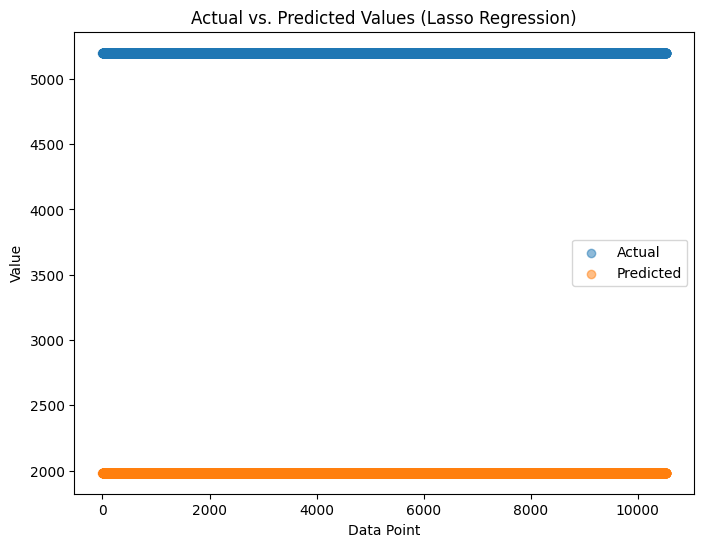

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of indices for the data points
indices = np.arange(len(y_test))

# Sort the arrays for plotting
sorted_indices = np.argsort(y_test)

# Sort the actual and predicted values based on the sorted indices
y_test_sorted = y_test[sorted_indices]
y_pred_lasso_sorted = y_pred_lasso[sorted_indices]

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(indices, y_test_sorted, label='Actual', alpha=0.5)
plt.scatter(indices, y_pred_lasso_sorted, label='Predicted', alpha=0.5)
plt.title("Actual vs. Predicted Values (Lasso Regression)")
plt.xlabel("Data Point")
plt.ylabel("Value")
plt.legend()
plt.show()


# RandomForestClassifier


In [181]:
X_rfe = df[feature_names]
print(X_rfe)


        data_channel_is_entertainment   data_channel_is_socmed  \
0                                 1.0                      0.0   
1                                 0.0                      0.0   
2                                 0.0                      0.0   
3                                 1.0                      0.0   
4                                 0.0                      0.0   
...                               ...                      ...   
39639                             0.0                      0.0   
39640                             0.0                      1.0   
39641                             0.0                      0.0   
39642                             0.0                      0.0   
39643                             1.0                      0.0   

        data_channel_is_tech   data_channel_is_world   kw_min_avg  \
0                        0.0                     0.0     0.000000   
1                        0.0                     0.0     0.000000   


In [153]:
X_rfe = df[feature_names].values
y_rfe = df[' shares'].values

# Split the data into a 70:30 train-test split
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe, y_rfe, test_size=0.3, random_state=42)

y_rfe_train = np.array(y_rfe_train).reshape(-1, 1)
y_rfe_test = np.array(y_rfe_test).reshape(-1, 1)


# Normalize the features using StandardScaler
scaler = StandardScaler()
X_rfe_train = scaler.fit_transform(X_rfe_train)
X_rfe_test = scaler.transform(X_rfe_test)
y_rfe_train = scaler.fit_transform(y_rfe_train)
y_rfe_test = scaler.transform(y_rfe_test)

rf_regressor = RandomForestRegressor(n_estimators=100, bootstrap=True,max_depth=10,random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_rfe_train, y_rfe_train)

# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_rfe_test)

# Calculate MSE and adjusted R-squared on the test data
mse_rf = mean_squared_error(y_rfe_test, y_pred_rf)
r2_rf = r2_score(y_rfe_test, y_pred_rf)

print(mse_rf)
print(r2_rf)
#print(sklearn.metrics.mean_absolute_error(y_rfe_test,y_pred_rf))


C:\Users\Saahil Shaikh\AppData\Local\Temp\ipykernel_25032\4012515910.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_rfe_train, y_rfe_train)


1.4623595128868156
-0.012704265797668368


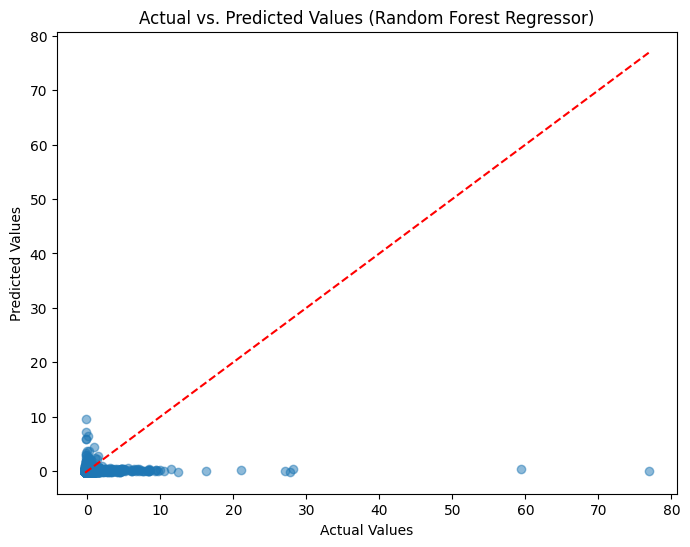

In [154]:
plt.figure(figsize=(8, 6))
plt.scatter(y_rfe_test, y_pred_rf, alpha=0.5)
plt.title("Actual vs. Predicted Values (Random Forest Regressor)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add a 45-degree reference line
plt.plot([min(y_rfe_test), max(y_rfe_test)], [min(y_rfe_test), max(y_rfe_test)], color='red', linestyle='--')

plt.show()

In [157]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid you want to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5,7,9,10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor(bootstrap=True, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_rfe_train, y_rfe_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_rf_regressor = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_rf = best_rf_regressor.predict(X_rfe_test)

# Calculate MSE and adjusted R-squared on the test data
mse_rf = mean_squared_error(y_rfe_test, y_pred_rf)
r2_rf = r2_score(y_rfe_test, y_pred_rf)

# Print the best parameters and evaluation metrics
print("Best Parameters:")
print(best_params)
print("MSE:", mse_rf)
print("R-squared:", r2_rf)


C:\Users\Saahil Shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
MSE: 1.4247857423042454
R-squared: 0.013316091997902624


In [166]:
#Running Random Forest after running GridSearchCV
X_rfe = df[feature_names].values
y_rfe = df[' shares'].values

# Split the data into a 70:30 train-test split
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe, y_rfe, test_size=0.3, random_state=42)

y_rfe_train = np.array(y_rfe_train).reshape(-1, 1)
y_rfe_test = np.array(y_rfe_test).reshape(-1, 1)


# Normalize the features using StandardScaler
scaler = StandardScaler()
X_rfe_train = scaler.fit_transform(X_rfe_train)
X_rfe_test = scaler.transform(X_rfe_test)
y_rfe_train = scaler.fit_transform(y_rfe_train)
y_rfe_test = scaler.transform(y_rfe_test)

rf_regressor = RandomForestRegressor(max_depth= 5, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split=2, n_estimators= 300, bootstrap=True,random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_rfe_train, y_rfe_train)

# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_rfe_test)

# Calculate MSE and adjusted R-squared on the test data
mse_rf = mean_squared_error(y_rfe_test, y_pred_rf)
r2_rf = r2_score(y_rfe_test, y_pred_rf)

print(mse_rf)
print(r2_rf)




C:\Users\Saahil Shaikh\AppData\Local\Temp\ipykernel_25032\474601178.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_rfe_train, y_rfe_train)


1.4247857423042454
0.013316091997902624


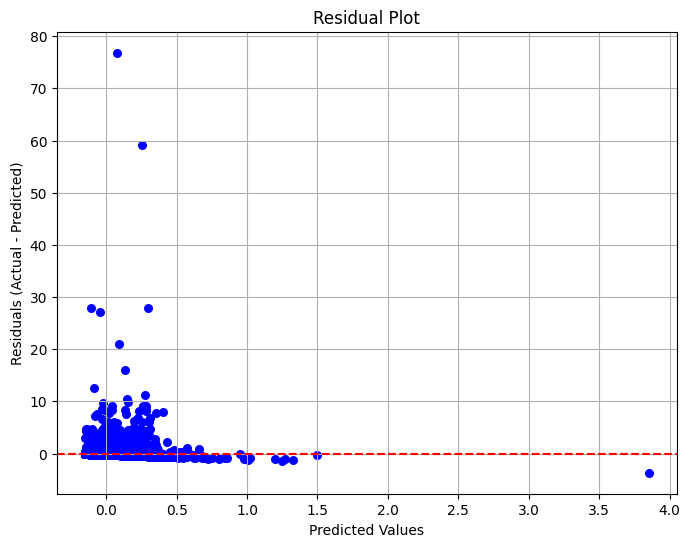

In [170]:

# Transform the predicted values back to their original scale using the inverse transform
#y_pred_rf = scaler.inverse_transform(y_pred_rf)

# Ensure y_pred_rf and residuals are one-dimensional arrays
y_pred_rf = y_pred_rf.flatten()  # Flatten to a 1D array

# Calculate the residuals
residuals = y_rfe_test.flatten() - y_pred_rf

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals, c='blue', marker='o', s=30)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

In [148]:
# Perform k-fold cross-validation on original Data 
num_folds = 5  # You can adjust the number of folds as needed
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define scoring functions (MSE and adjusted R-squared)
mse_scorer = make_scorer(mean_squared_error)
adjusted_r2_scorer = make_scorer(r2_score)

# Evaluate the model using k-fold cross-validation
mse_scores = -cross_val_score(rf_regressor, X_train, y_train, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(rf_regressor, X_train, y_train, cv=kf, scoring=adjusted_r2_scorer)

# Print the results
print("Random Forest Regression Results:")
print(f"Mean Squared Error (MSE) for {num_folds}-fold cross-validation:")
for fold, mse in enumerate(mse_scores):
    print(f"Fold {fold+1}: {mse:.2f}")
print(f"Mean MSE: {mse_scores.mean():.2f}\n")

print(f"Adjusted R-squared (R2) for {num_folds}-fold cross-validation:")
for fold, r2 in enumerate(r2_scores):
    print(f"Fold {fold+1}: {r2:.2f}")
print(f"Mean Adjusted R-squared: {r2_scores.mean():.2f}\n")

print(f"Mean Squared Error (MSE) on the test data: {mse_rf:.2f}")
print(f"Adjusted R-squared (R2) on the test data: {r2_rf:.2f}")


C:\Users\Saahil Shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Saahil Shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Saahil Shaikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Saahil 

Random Forest Regression Results:
Mean Squared Error (MSE) for 5-fold cross-validation:
Fold 1: -1110234.77
Fold 2: -1087612.69
Fold 3: -1076711.29
Fold 4: -1052215.57
Fold 5: -1051411.39
Mean MSE: -1075637.14

Adjusted R-squared (R2) for 5-fold cross-validation:
Fold 1: 0.11
Fold 2: 0.12
Fold 3: 0.12
Fold 4: 0.13
Fold 5: 0.14
Mean Adjusted R-squared: 0.12

Mean Squared Error (MSE) on the test data: 1.46
Adjusted R-squared (R2) on the test data: -0.01
